In [1]:
import os,subprocess
workdir='/nagyvinyok/adat84/sotejedlik/ribli/expression/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble

In [3]:
import pandas as pd
import numpy as np
import gc

def read_my_data(fname,**kwargs):
    """Load my data from file into np.arrays.
    
    I had to use garbage collector, because pandas read_csv leaves garbage around.
    """
    
    #load data
    print "Loading data... "
    x=pd.read_csv(fname,sep='\t',header=None)
    
    # for some reason not everything is cleaned up
    #when using the pandas read_csv
    gc.collect()
    
    #probe_id=x[0]
    #y=x.iloc[:,-1].values.astype(np.int8)
    #x=x.iloc[:,1:-1].values.astype(np.int8)
    #return probe_id,x,y
    
    return x[0],x.iloc[:,1:-1].values.astype(np.int8),x.iloc[:,-1].values.astype(np.float64)

In [4]:
train_id,train_x,train_y = read_my_data(fname='../prepare_data/naive_feat_vect.csv')
print train_x.shape

Loading data... 
(234044, 600)


In [5]:
import time
def test_sklearn_model(model,train_x,train_y,test_x,test_y):
    start=time.time()
    model=model.fit(train_x,train_y)
    
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    
    print 'train rmse:',np.mean((train_pred-train_y)**2)
    print 'test rmse:',np.mean((test_pred-test_y)**2)
    print 'It took:',time.time()-start
    
    return train_pred,test_pred

In [6]:
N_train=40000
N_test=20000

rf = ensemble.RandomForestRegressor(n_estimators=100,min_samples_split=10,n_jobs=14)
train_pred,test_pred=test_sklearn_model(
    rf,train_x[:N_train],train_y[:N_train],
    train_x[N_train:N_train+N_test],train_y[N_train:N_train+N_test])

train rmse: 1.60875059017
test rmse: 7.55791137755
It took: 98.8459041119


### Plot results

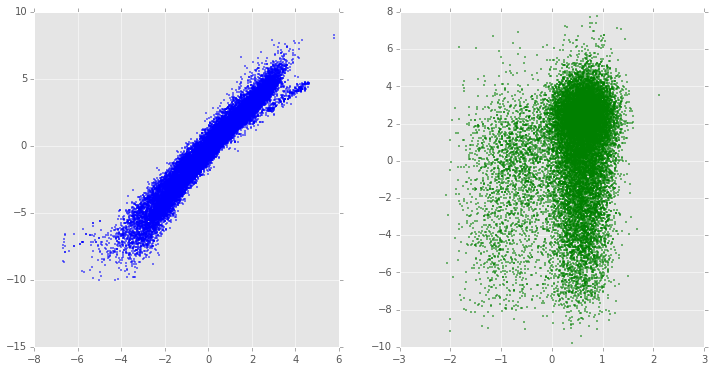

In [7]:
fig=plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.plot(train_pred,train_y[:N_train],'.',ms=2,c='b')
fig.add_subplot(122)
dump=plt.plot(test_pred,train_y[N_train:N_train+N_test],'.',ms=2,c='g')